## Cat/Dog Binary Classification

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:

classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [9]:
## data importing  scaling

train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset/training',target_size=(64, 64),class_mode='binary')

Found 98 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

In [13]:
## Importng test data
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(64, 64),class_mode='binary')

Found 38 images belonging to 2 classes.


In [36]:
## fitting model to images
classifier.fit(train_set,epochs=50,validation_data=test_set)

Epoch 1/50
4/4 [==============================] - 2s 405ms/step - loss: 0.6893 - accuracy: 0.6020 - val_loss: 0.6926 - val_accuracy: 0.5263
Epoch 2/50
4/4 [==============================] - 1s 308ms/step - loss: 0.6887 - accuracy: 0.5510 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 1s 350ms/step - loss: 0.7016 - accuracy: 0.5000 - val_loss: 0.7143 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 1s 435ms/step - loss: 0.6979 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5263
Epoch 5/50
4/4 [==============================] - 2s 372ms/step - loss: 0.6807 - accuracy: 0.5408 - val_loss: 0.6895 - val_accuracy: 0.5526
Epoch 6/50
4/4 [==============================] - 2s 535ms/step - loss: 0.6714 - accuracy: 0.7143 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 1s 476ms/step - loss: 0.6711 - accuracy: 0.5918 - val_loss: 0.6988 - val_accuracy: 0.5263
Epoch 8/50
4/4 [====

In [60]:
#save the model
classifier.save('catdogmodel1311.h5')

In [48]:
## prediction of single new data

test_image= image.load_img('dataset/inference/dog1.jpg' ,target_size =(64,64))


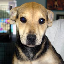

In [49]:
test_image

In [50]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [51]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [52]:
result = classifier.predict(test_image)

In [53]:
result

array([[1.]], dtype=float32)

In [57]:
result=np.around(result)

In [58]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
   prediction = 'cat'
    

In [59]:
prediction

'dog'